In [98]:
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
transcriptions_df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/whispher-ak-gh-new-era/dataset/transcriptions-2000.xlsx")

In [100]:
transcriptions_df.head(2)

,unamed,File No.,IMAGE_PATH,IMAGE_SRC_URL,AUDIO_PATH,Transcriptions,SPEAKER_ID,ORG_NAME,PROJECT_NAME,LOCALE,GENDER,AGE,DEVICE,ENVIRONMENT,YEAR,Full Filename,Filename
0,4,18932,Akan/images/0011.jpg,https://c8.alamy.com/comp/PCCH2B/techiman-ghan...,Akan\selected transcribed audios\audios\_image...,Mmɔfra anan a ɔde bokiti ato nsu mu resaw. Asa...,6388,University of Ghana,Waxal,ak_gh,Male,21,TCL 5102O,Outdoor,2023,_image_0011_u893_5_1683649978142_18932.mp3,_image_0011_u893_5_1683649978142.mp3
1,1277,15765,Akan/images/0021.jpg,https://media.istockphoto.com/id/1323846471/ph...,Akan\selected transcribed audios\audios\_image...,Akataasiaba wɔ ne gyaadze. Okitsa biribi wɔ ne...,3890,University of Ghana,Waxal,ak_gh,Female,56,samsung SM-A022F,Indoor,2023,_image_0021_u122_1_1679478597335_15765.mp3,_image_0021_u122_1_1679478597335.mp3


### **Data Preprocessing**

**Inspect Characters inside Transcriptions**

In [101]:
def extract_all_chars(batch):
  # extract tokens from transcriptions
  all_text = " ".join(batch["Transcriptions"])
  vocab = list(set(all_text))
  return {"vocab": [vocab], "all_text": [all_text]}

In [102]:
def check_transcription_tokens(transcriptions_train):

  # get unique characters or tokens from dataset
  all_vocabs = []
    # Iterate over each row in the transcriptions_train Series
  for row in transcriptions_train:
    # Access the 'vocab' list within the dictionary in each row
    all_vocabs.extend(row['vocab'][0])

  # Create a set to remove duplicate vocabs
  vocab_set = set(all_vocabs)

  return vocab_set

In [103]:
def check_vocab_len(vocab_set):
  # Get all unique tokens in a dict
  vocab_all_dict = {k: v for k, v in enumerate(vocab_set)}

  vocab_len = len(vocab_all_dict)

  print(f"The length of our Akan Twi vocabulary is {vocab_len}")

  return vocab_all_dict

In [104]:
# extract tokens from Transcription

transcriptions_train = transcriptions_df.apply(extract_all_chars, axis=1)

In [105]:
# check transcriptions vocab information

check_vocab_len(check_transcription_tokens(transcriptions_train))

The length of our Akan Twi vocabulary is 70


{0: 'd',
 1: ' ',
 2: 'g',
 3: 'e',
 4: '.',
 5: 'D',
 6: 'x',
 7: 'S',
 8: 'H',
 9: 'T',
 10: 'u',
 11: 'z',
 12: 'O',
 13: 'r',
 14: 'Ɔ',
 15: 'U',
 16: 'Z',
 17: '!',
 18: 'f',
 19: 'M',
 20: 'a',
 21: 'y',
 22: 'N',
 23: 'o',
 24: 'G',
 25: 'X',
 26: 'Q',
 27: ',',
 28: 'v',
 29: ')',
 30: 'W',
 31: 'V',
 32: 'P',
 33: '’',
 34: ';',
 35: 'Ɛ',
 36: 'b',
 37: 'h',
 38: 'I',
 39: '…',
 40: 'Ↄ',
 41: 'L',
 42: 't',
 43: 'R',
 44: 'q',
 45: 'p',
 46: 's',
 47: 'k',
 48: 'F',
 49: 'w',
 50: '=',
 51: 'j',
 52: 'C',
 53: 'A',
 54: 'i',
 55: "'",
 56: '-',
 57: 'ɛ',
 58: 'E',
 59: 'ℇ',
 60: '3',
 61: 'ƒ',
 62: 'l',
 63: 'K',
 64: 'ɔ',
 65: 'B',
 66: 'Y',
 67: 'm',
 68: 'n',
 69: 'c'}

**Replace or Remove Unknown Characters Transcriptions**

In [106]:
import re
chars_to_ignore_regex = '[\=\!\�]'

def remove_special_characters(batch):
  # remove some characters from transcriptions
  batch["Transcriptions"] = re.sub(chars_to_ignore_regex, '', batch["Transcriptions"]) + " "
  return batch

In [107]:
def replace_weird_characters(batch):
  # replace out of place characters
  batch["Transcriptions"] = re.sub('[ℇ]', 'Ɛ', batch["Transcriptions"])
  batch["Transcriptions"] = re.sub('[Ↄ]', 'Ɔ', batch["Transcriptions"])
  batch["Transcriptions"] = re.sub('[ƒ]', 'f', batch["Transcriptions"])
  batch["Transcriptions"] = re.sub('[…]', ' ', batch["Transcriptions"])
  batch["Transcriptions"] = re.sub('[3]', 'ɛ', batch["Transcriptions"])
  batch["Transcriptions"] = re.sub('[’]', "'", batch["Transcriptions"])
  batch["Transcriptions"] = re.sub('[)]', 'ɔ', batch["Transcriptions"])
  return batch


In [108]:
# preprocess transcriptions

transcriptions_df = transcriptions_df.apply(remove_special_characters, axis=1)
transcriptions_df = transcriptions_df.apply(replace_weird_characters, axis=1)

In [109]:
# confirm transcription preprocessing

transcriptions_test = transcriptions_df.apply(extract_all_chars, axis=1)
check_vocab_len(check_transcription_tokens(transcriptions_test))

The length of our Akan Twi vocabulary is 61


{0: 'd',
 1: ' ',
 2: 'g',
 3: 'e',
 4: '.',
 5: 'D',
 6: 'x',
 7: 'S',
 8: 'H',
 9: 'T',
 10: 'u',
 11: 'z',
 12: 'O',
 13: 'r',
 14: 'Ɔ',
 15: 'U',
 16: 'Z',
 17: 'f',
 18: 'M',
 19: 'a',
 20: 'y',
 21: 'N',
 22: 'o',
 23: 'G',
 24: 'X',
 25: 'Q',
 26: ',',
 27: 'v',
 28: 'W',
 29: 'V',
 30: 'P',
 31: ';',
 32: 'Ɛ',
 33: 'b',
 34: 'h',
 35: 'I',
 36: 'L',
 37: 't',
 38: 'R',
 39: 'q',
 40: 'p',
 41: 's',
 42: 'k',
 43: 'F',
 44: 'w',
 45: 'j',
 46: 'C',
 47: 'A',
 48: 'i',
 49: "'",
 50: '-',
 51: 'ɛ',
 52: 'E',
 53: 'l',
 54: 'K',
 55: 'ɔ',
 56: 'B',
 57: 'Y',
 58: 'm',
 59: 'n',
 60: 'c'}

In [110]:
transcriptions_df.to_excel("/content/drive/MyDrive/Colab Notebooks/whispher-ak-gh-new-era/dataset/prep-transcriptions-2000.xlsx", index=False)

### **Prepare Data for Whisper ASR**

In [111]:
prep_transcriptions_df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/whispher-ak-gh-new-era/dataset/prep-transcriptions-2000.xlsx")

In [112]:
prep_transcriptions_df.columns

Index(['unamed', 'File No.', 'IMAGE_PATH', 'IMAGE_SRC_URL', 'AUDIO_PATH',
       'Transcriptions', 'SPEAKER_ID', 'ORG_NAME', 'PROJECT_NAME', 'LOCALE',
       'GENDER', 'AGE', 'DEVICE', 'ENVIRONMENT', 'YEAR', 'Full Filename',
       'Filename'],
      dtype='object')

In [113]:
unneccessary_columns = ['unamed', 'File No.', 'IMAGE_PATH', 'IMAGE_SRC_URL','AUDIO_PATH', 'SPEAKER_ID', 'ORG_NAME','PROJECT_NAME', 'LOCALE', 'GENDER', 'AGE', 'DEVICE', 'ENVIRONMENT','YEAR', 'Filename']

prep_transcriptions_df = prep_transcriptions_df.drop(unneccessary_columns, axis=1)

In [114]:
# Switch the positions of columns 'Transcriptions' and 'Full Filename'
prep_transcriptions_df =prep_transcriptions_df[['Full Filename', 'Transcriptions']]

In [115]:
# Rename columns
prep_transcriptions_df.columns = ['file_name', 'transcription']

In [116]:
prep_transcriptions_df.head(10)

,file_name,transcription
0,_image_0011_u893_5_1683649978142_18932.mp3,Mmɔfra anan a ɔde bokiti ato nsu mu resaw. Asa...
1,_image_0021_u122_1_1679478597335_15765.mp3,Akataasiaba wɔ ne gyaadze. Okitsa biribi wɔ ne...
2,_image_0021_u192_1_1679697868381_03106.mp3,Ɔbea bi gyina kitchen a ɔkura fon wɔ ne nsam a...
3,_image_0027_u190_1_1679725603456_09436.mp3,Ɔbaa bi hyɛ ataade tuntum. Ɔtena akonnwa so. L...
4,_image_0042_u193_1_1679693018754_03110.mp3,"Papa penyin bi te egua so, na abranteɛ bi kita..."
5,_image_0045_u189_1_1679437808712_15775.mp3,Obronin a nkwadaa atwa ne ho ahyia a wɔn ani a...
6,_image_0052_u192_1_1679698531375_15774.mp3,Mmayewa soso nneɛma a wɔarape wɔ ade mu ɛde re...
7,_image_0052_u26_1_1679479240865_18939.mp3,Mmesiamma waato santen a wɔde nnoɔma asoɛsoa w...
8,_image_0067_u26_1_1679482591551_06277.mp3,"Iguam a adzetɔnfo wɔtsena hɔn nneɛma ekyir, na..."
9,_image_0076_u26_1_1679488708020_06278.mp3,Aberanteɛ bi a wahyehyɛ ne ho kamakama. N'afad...


In [117]:
# save prepared transcription as metadata

prep_transcriptions_df.to_csv("/content/drive/MyDrive/Colab Notebooks/whispher-ak-gh-new-era/dataset/metadata-2000.csv",index=False)

### **Exploratory Data Analysis**

In [118]:
transcriptions_df.shape

(2000, 17)

In [119]:
transcriptions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   unamed          2000 non-null   int64 
 1   File No.        2000 non-null   int64 
 2   IMAGE_PATH      2000 non-null   object
 3   IMAGE_SRC_URL   2000 non-null   object
 4   AUDIO_PATH      2000 non-null   object
 5   Transcriptions  2000 non-null   object
 6   SPEAKER_ID      2000 non-null   int64 
 7   ORG_NAME        2000 non-null   object
 8   PROJECT_NAME    2000 non-null   object
 9   LOCALE          2000 non-null   object
 10  GENDER          2000 non-null   object
 11  AGE             2000 non-null   int64 
 12  DEVICE          2000 non-null   object
 13  ENVIRONMENT     2000 non-null   object
 14  YEAR            2000 non-null   int64 
 15  Full Filename   2000 non-null   object
 16  Filename        2000 non-null   object
dtypes: int64(5), object(12)
memory usage: 265.8+ KB


In [120]:
transcriptions_df.isnull().sum()

,0
unamed,0
File No.,0
IMAGE_PATH,0
IMAGE_SRC_URL,0
AUDIO_PATH,0
Transcriptions,0
SPEAKER_ID,0
ORG_NAME,0
PROJECT_NAME,0
LOCALE,0


In [121]:
transcriptions_df.columns

Index(['unamed', 'File No.', 'IMAGE_PATH', 'IMAGE_SRC_URL', 'AUDIO_PATH',
       'Transcriptions', 'SPEAKER_ID', 'ORG_NAME', 'PROJECT_NAME', 'LOCALE',
       'GENDER', 'AGE', 'DEVICE', 'ENVIRONMENT', 'YEAR', 'Full Filename',
       'Filename'],
      dtype='object')

In [122]:
data_size = len(transcriptions_df.index)
data_size

2000

In [123]:
def plot_bar_chart(transcriptions_df, column_name, x_label, y_label, plt_title,  figsize=(10, 6)):

  # Convert the specified column to a categorical data type.
  transcriptions_df[f'{column_name}'] = pd.Categorical(transcriptions_df[f'{column_name}'])

    # Create a figure and axes with the specified figsize
  # fig, ax = plt.subplots(figsize=figsize)

  # plot gender distribution
  gender_counts = transcriptions_df[f'{column_name}'].value_counts()
  gender_counts.plot(kind='bar')
  plt.xlabel(f'{x_label}')
  plt.ylabel(f'{y_label}')
  plt.title(f'{plt_title}')
  plt.show()

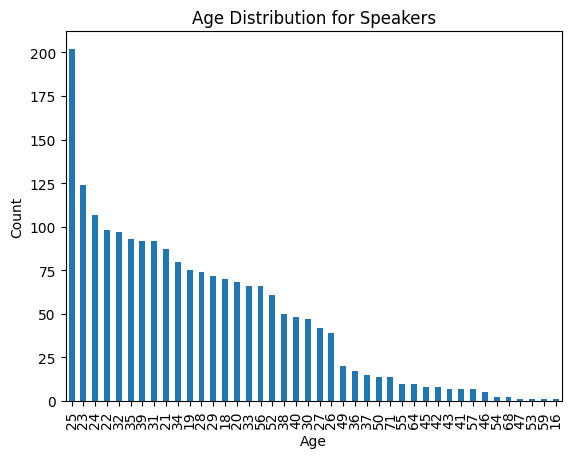

In [124]:
# Plot Age Distribution

plot_bar_chart(transcriptions_df, 'AGE', 'Age', 'Count', 'Age Distribution for Speakers')

In [125]:
male_count = transcriptions_df['GENDER'].value_counts().Male
female_count = transcriptions_df['GENDER'].value_counts().Female

male_count, female_count

(1190, 810)

In [126]:
male = (male_count/data_size) * 100
female = (female_count/data_size) * 100

print(f"Male speakers percentage: {male} %")
print(f"Female speakers  percentage: {female} %")

Male speakers percentage: 59.5 %
Female speakers  percentage: 40.5 %


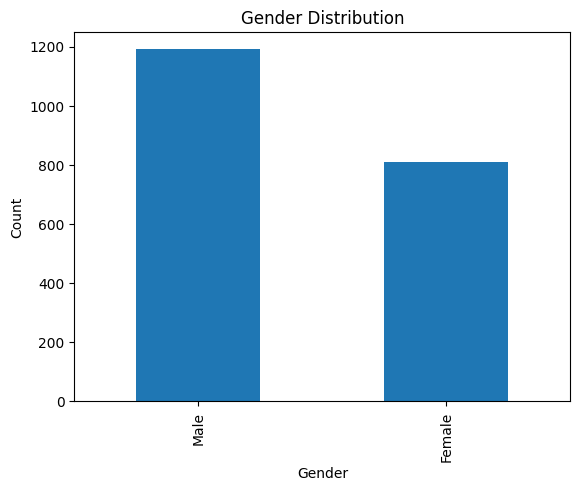

In [127]:
# Plot Gender Distribution

plot_bar_chart(transcriptions_df, 'GENDER', 'Gender', 'Count', 'Gender Distribution')

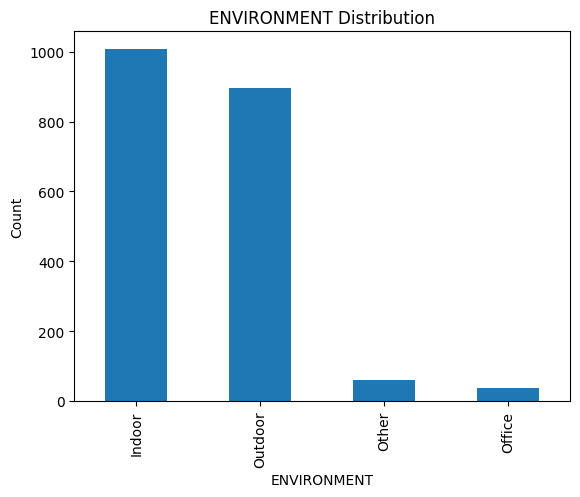

In [128]:
# Plot Environment Distribution

plot_bar_chart(transcriptions_df, 'ENVIRONMENT', 'ENVIRONMENT', 'Count', 'ENVIRONMENT Distribution')

In [129]:
transcriptions_df['SPEAKER_ID'].value_counts()

,count
SPEAKER_ID,
64,64
4384,64
65,57
3868,55
4811,48
...,...
5609,1
6089,1
5704,1


In [130]:
# Number of Speakers in the dataset

print(f"The are {transcriptions_df['SPEAKER_ID'].nunique()} number of speakers in the dataset")

The are 354 number of speakers in the dataset
